#Color Filtering Algorithm

In [2]:
import cv2 as cv
import numpy as np

img=cv.imread('Elon.jpg')
cv.imshow('Elon',img)
hsv=cv.cvtColor(img , cv.COLOR_BGR2HSV)
cv.imshow('Elon HSV',hsv)

lower_hue=np.array([21,0,0])
upper_hue=np.array([45,255,255])

mask=cv.inRange(hsv , lower_hue , upper_hue)
result=cv.bitwise_and(img , img , mask=mask)

cv.imshow('Bitwise Elon',result)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


# Face Detection Algorithm

In [ ]:
import cv2 as cv
from google.colab.patches import cv.imshow

face_cascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")

img=cv.imread('Group.jpg')
gray=cv.cvtColor(img , cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray , 1.3 , 5)
#1.3 and 5 are randomly chosen and can be changed

print(faces)

for (x,y,w,h) in faces:
  cv.rectangle(img , (x,y) , (x+w,y+h) , (0,255,0) , 3)

cv.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

# Shape Recognition Algorithm

In [ ]:
%cd /content

/content


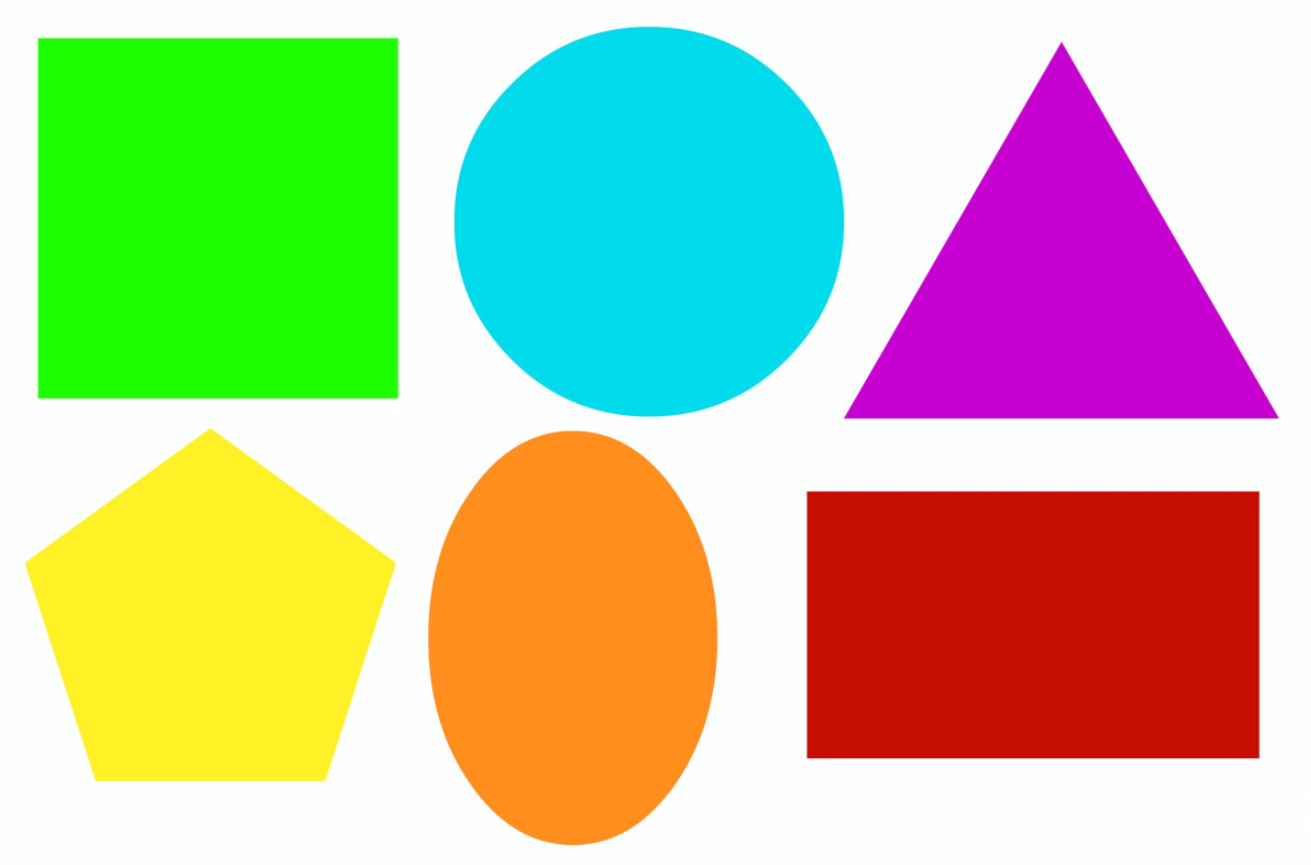

4
Rectangle found
14
Circle/Ellipse found
5
Pentagon found
3
Triangle found
4
Rectangle found
16
Circle/Ellipse found


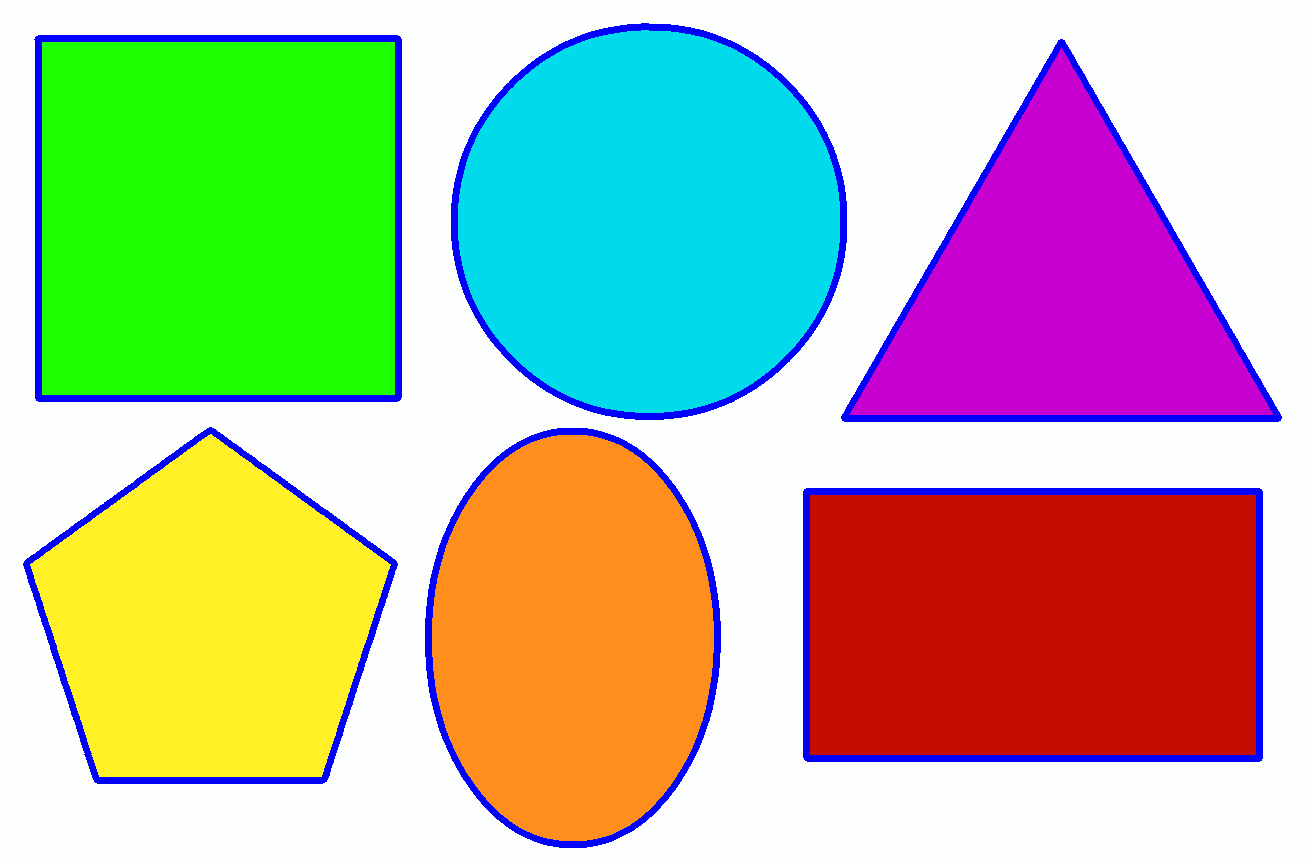

In [ ]:
import cv2 as cv
from google.colab.patches import cv.imshow
import numpy as np

img=cv.imread('Shapes.jpg')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh=cv.threshold(gray,225,255,1)
cv.imshow(img)

cont,h=cv.findContours(thresh,1,2)
for cnt in cont:
  approx=cv.approxPolyDP(cnt,0.01*cv.arcLength(cnt,True),True)
  n=len(approx)
  print(n)
  if n==3:
    cv.drawContours(img,[cnt],0,255,5)
    print('Triangle found')
  elif n==4:
    cv.drawContours(img,[cnt],0,255,5)
    print('Rectangle found')
  elif n==5:
    cv.drawContours(img,[cnt],0,255,5)
    print('Pentagon found')
  elif n==6:
    cv.drawContours(img,[cnt],0,255,5)
    print('Hexagon found')
  elif n==7:
    cv.drawContours(img,[cnt],0,255,5)
    print('Heptagon found')
  elif n==8:
    cv.drawContours(img,[cnt],0,255,5)
    print('Octagon found')
  elif n>=9:
    cv.drawContours(img,[cnt],0,255,5)
    print('Circle/Ellipse found')

cv.imshow(img)

#Face Recognition Algorithm


In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Train algo by faces

In [ ]:
import cv2 as cv
import face_recognition
import numpy as np
from google.colab.patches import cv.imshow

face1=face_recognition.load_image_file('elon.jpg')
face1_encoding=face_recognition.face_encodings(face1)[0]

face2=face_recognition.load_image_file('Donald Trump.jpg')
face2_encoding=face_recognition.face_encodings(face2)[0]

face3=face_recognition.load_image_file('Prashant.jpg')
face3_encoding=face_recognition.face_encodings(face3)[0]

face4=face_recognition.load_image_file('Large.jpg')
face4_encoding=face_recognition.face_encodings(face4)[0]

known=[face1_encoding,
       face2_encoding,
       face3_encoding,
       face4_encoding]

known_names=["Elon Musk",
             "Donald Trump",
             "Prashant Jain",
             "Nikshay Jain"]

Recognise unknown faces

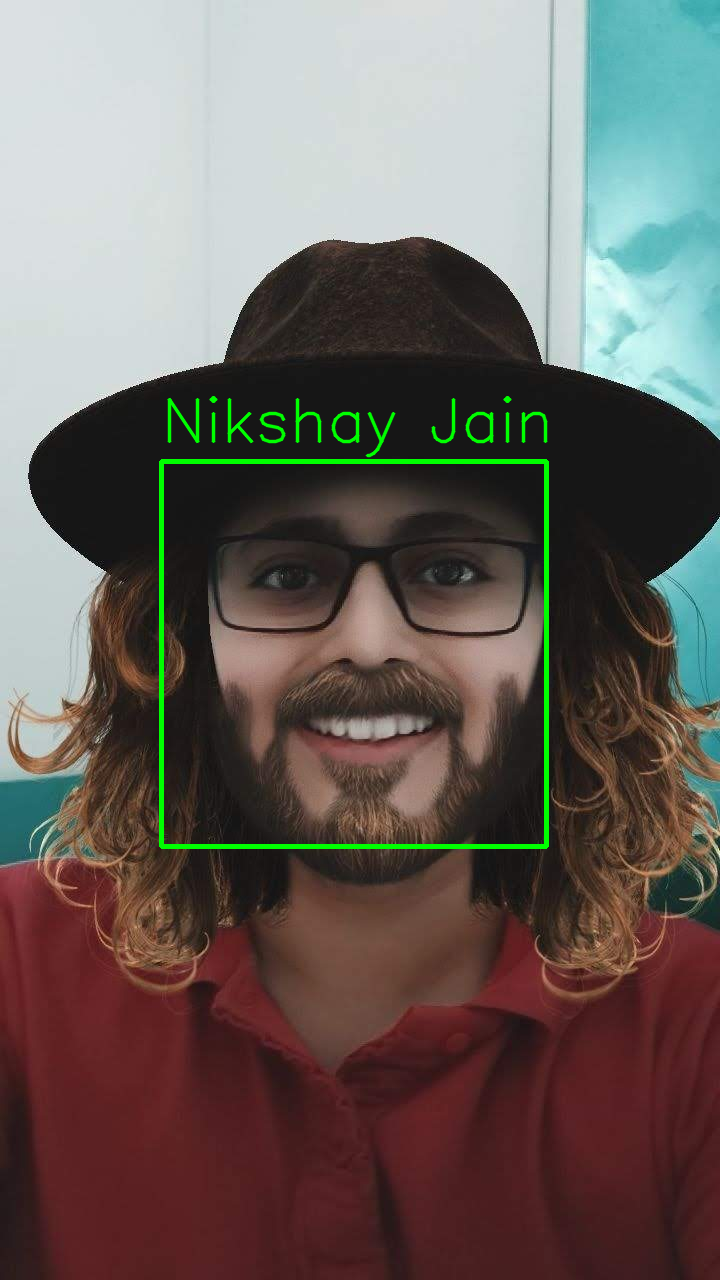

In [ ]:
from face_recognition.api import face_locations
file_name="Nik (1).jpg"
unknown_image=face_recognition.load_image_file(file_name)
unknown_draw=cv.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image,face_locations)

for (top,right,bottom,left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known , face_encoding)
  name = "Unknown"

  face_distances = face_recognition.face_distance(known , face_encoding)
  best_match_index = np.argmin(face_distances)

  if matches[best_match_index]:
    name = known_names[best_match_index]
    cv.rectangle(unknown_draw , (left,top) , (right,bottom) , (0,255,0) , 3)
    cv.putText(unknown_draw , name , (left,top-20) , cv.FONT_HERSHEY_SIMPLEX , 2 , (0,255,0) , 2 , cv.LINE_AA)

cv.imshow(unknown_draw)

In [ ]:
!pip install face_recognition

In [3]:
from google.colab import files

In [15]:
up=files.upload()

Saving Beach 2.MOV to Beach 2.MOV


In [19]:
import cv2 as cv
#import face_recognition
#import numpy as np
from google.colab.patches import cv.imshow

up1 = cv.VideoCapture('up')
while up1.isOpened():
  ret,frame=up1.read()
  if not ret or 0xFF==ord('d'):
    break
  cv.rectangle(frame , (50,50) , (200,200) , 3)
files.download('Beach 2.MOV')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import cv2
import glob

frameSize = (500, 500)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'XVID'), 60, frameSize)

for filename in glob.glob('BEACH 2.MOV'):
    img = cv2.imread(filename)
    cv.rectangle(img , (50,50) , (200,200) , 3)
    out.write(img)

out.release()

In [32]:
files.download('output_video.avi')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>